In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('wine_data.csv')

In [4]:
data.shape

(178, 13)

In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## Step 1

In [6]:
sc = StandardScaler()
data_sc = sc.fit_transform(data)

In [9]:
data_sc = pd.DataFrame(data_sc,columns = data.columns)

## Step 2

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=13)
pca.fit(data_sc)

PCA(n_components=13)

In [15]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [16]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data_sc)

In [19]:
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

## Step 3 

## KMeans Clusterring

#### Finding value of k

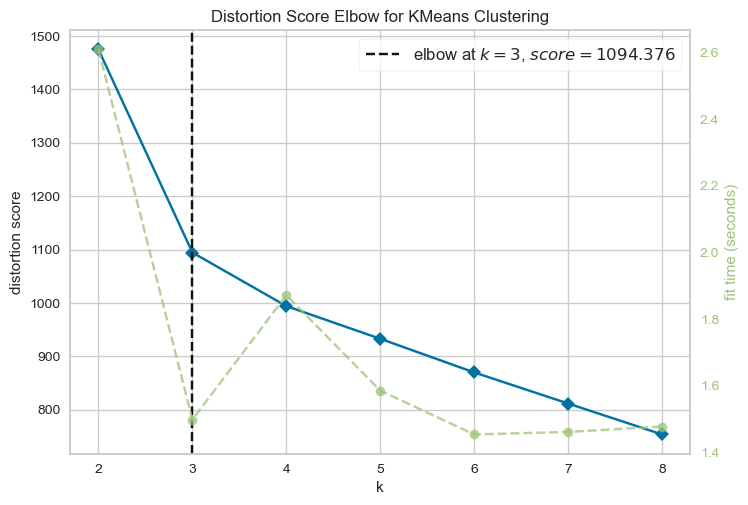

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
kelbow = KElbowVisualizer(KMeans(),k=8)
kelbow.fit(data_pca)
kelbow.show()


In [28]:
silo_score = []
for i in [2,3,4,5,6,7,8,9]:
    model = KMeans(n_clusters=i)
    model.fit(data_pca)
    pred = model.predict(data_pca)
    silo_score.append(silhouette_score(data_pca,pred))

In [29]:
silo_score

[0.29300483220390083,
 0.31496969547055625,
 0.2846414058368015,
 0.26028802702130754,
 0.20901171026456722,
 0.23330184717907,
 0.17405557069108324,
 0.22613192760189568]

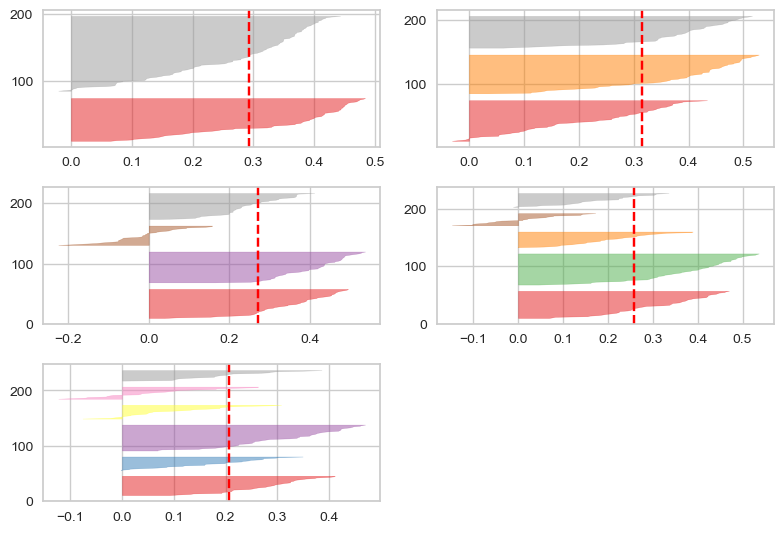

In [31]:
t = 1
for i in [2,3,4,5,6,7]:
    plt.subplot(3,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    t+=1
plt.tight_layout()
plt.show()

## Step 4

In [32]:
final_model = KMeans(n_clusters=3)
final_model.fit(data_pca)
pred = final_model.predict(data_pca)
silhouette_score(data_pca,pred)

0.31496969547055625

In [34]:
data['KMeans_pred'] = pred
data['KMeans_pred'].value_counts()

2    65
0    62
1    51
Name: KMeans_pred, dtype: int64

In [36]:
data.groupby(by='KMeans_pred').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
KMeans_pred,,,,,,,,,,,,,
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


## Step 5

In [37]:
centroids = final_model.cluster_centers_

In [38]:
centroids

array([[ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02,  2.49642497e-02],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02, -7.38798948e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03, -1.80153234e-02]])

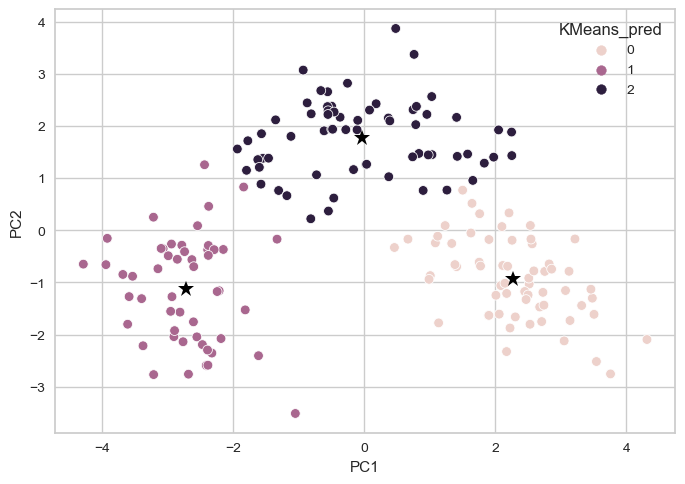

In [50]:
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data['KMeans_pred'])

for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],color='black',marker='*',ms=12)
plt.show()

## Step 6 

#### Agglomerative Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from sklearn.metrics.pairwise import euclidean_distances

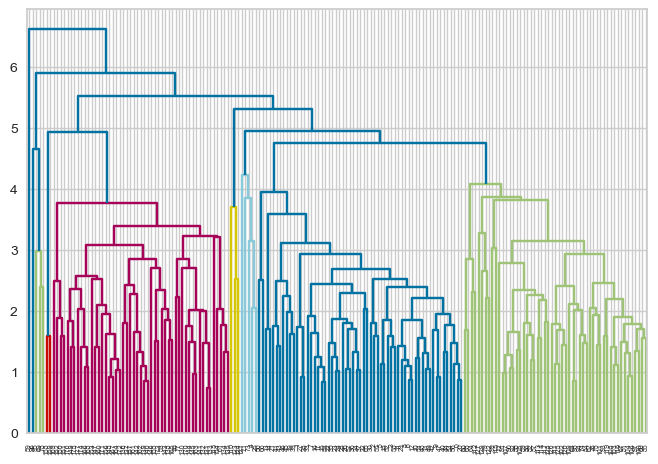

In [69]:
link = linkage(data_pca,method='average')
dendrogram(link)
plt.show()

In [70]:
dist_matx = euclidean_distances(data_pca)
actual_dist = dist_matx[np.triu_indices(178,k=1)]
ccc , cophenet_dist = cophenet(link,actual_dist)
ccc

0.7581484547996128

In [73]:
for i in [2,3,4,5,6,7,8,9]:
    model = AgglomerativeClustering(n_clusters=i,linkage='average')
    pred = model.fit_predict(data_pca)
    print(f'Silhoutte Score for {i} clusters {silhouette_score(data_pca,pred)}')

Silhoutte Score for 2 clusters 0.2755795001428828
Silhoutte Score for 3 clusters 0.18386656672939702
Silhoutte Score for 4 clusters 0.2633423670047913
Silhoutte Score for 5 clusters 0.2434471390072687
Silhoutte Score for 6 clusters 0.21204463360001924
Silhoutte Score for 7 clusters 0.1903570509083805
Silhoutte Score for 8 clusters 0.2875316883553813
Silhoutte Score for 9 clusters 0.27583868734355255


In [74]:
final_agg = AgglomerativeClustering(n_clusters=2)
pred = final_agg.fit_predict(data_pca)
data['Agg_pred'] = pred

In [75]:
data['Agg_pred'].value_counts()

0    122
1     56
Name: Agg_pred, dtype: int64

In [77]:
data.groupby(["Agg_pred"]).mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans_pred
Agg_pred,,,,,,,,,,,,,,
0,12.972623,1.955246,2.345246,18.802459,99.688525,2.570902,2.571557,0.321639,1.802787,4.235492,1.065984,3.017623,802.868852,0.983607
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,1.089286


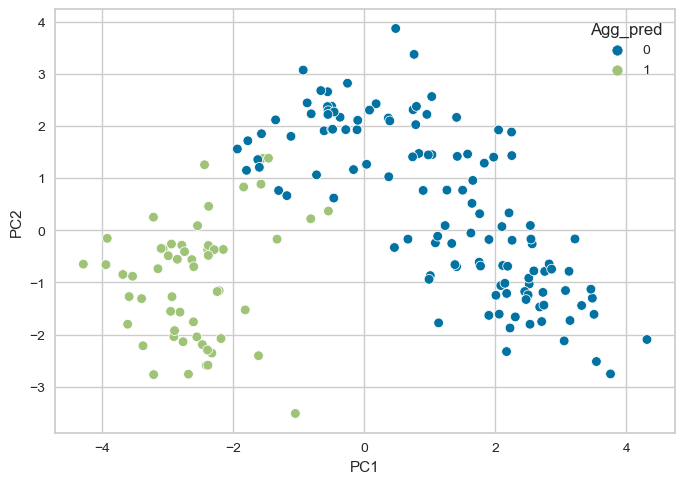

In [76]:
sns.scatterplot(x = data_pca['PC1'],y = data_pca['PC2'],hue = data['Agg_pred']);